In [1]:
# https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import json

f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [5]:
print(original_data)

[{'strat': 'Reducing emissions', 'mu': 28.899096002695895, 'sigma': 0.8683385667522899}, {'strat': 'Switch to renewable energy', 'mu': 28.798809502303534, 'sigma': 0.8523728975025295}, {'strat': 'Smart infrastructure', 'mu': 26.367234507026392, 'sigma': 0.860466384966178}, {'strat': 'Reshape our cities to be less car-dependent', 'mu': 26.331325647675076, 'sigma': 0.8282975906949623}, {'strat': 'Implement a carbon tax', 'mu': 26.02303259705505, 'sigma': 0.8297080360230354}, {'strat': 'Cut on consumption', 'mu': 25.852356314951276, 'sigma': 0.839289630040403}, {'strat': 'Electric vehicles', 'mu': 25.477115893718096, 'sigma': 0.8420541427064006}, {'strat': 'Educational tools about the effects and causes of climate change', 'mu': 24.939476510200514, 'sigma': 0.8197973842972517}, {'strat': 'Decentralized energy production and distribution systems', 'mu': 24.57391157681056, 'sigma': 0.8315909058977361}, {'strat': 'Design computers/electronics for disassembly/deconstruction', 'mu': 23.8809569

In [6]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [7]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
#   data.append([
#     d['strat'],
#     d['mu'] - d['sigma'],
#     d['mu'] + d['sigma']
#   ])
  
df = pd.DataFrame(data, columns=['Strategy', 'Value'])
print(df)

                                    Strategy      Value
0                     01. Reducing emissions  27.603202
1                     01. Reducing emissions  28.801811
2                     01. Reducing emissions  29.333391
3                     01. Reducing emissions  28.275241
4                     01. Reducing emissions  29.930064
5                     01. Reducing emissions  29.373742
6                     01. Reducing emissions  30.000660
7                     01. Reducing emissions  28.542656
8                     01. Reducing emissions  27.740160
9                     01. Reducing emissions  28.742594
10                    01. Reducing emissions  27.969900
11                    01. Reducing emissions  28.804974
12                    01. Reducing emissions  30.157649
13                    01. Reducing emissions  27.446448
14                    01. Reducing emissions  30.345753
15                    01. Reducing emissions  28.330399
16                    01. Reducing emissions  29

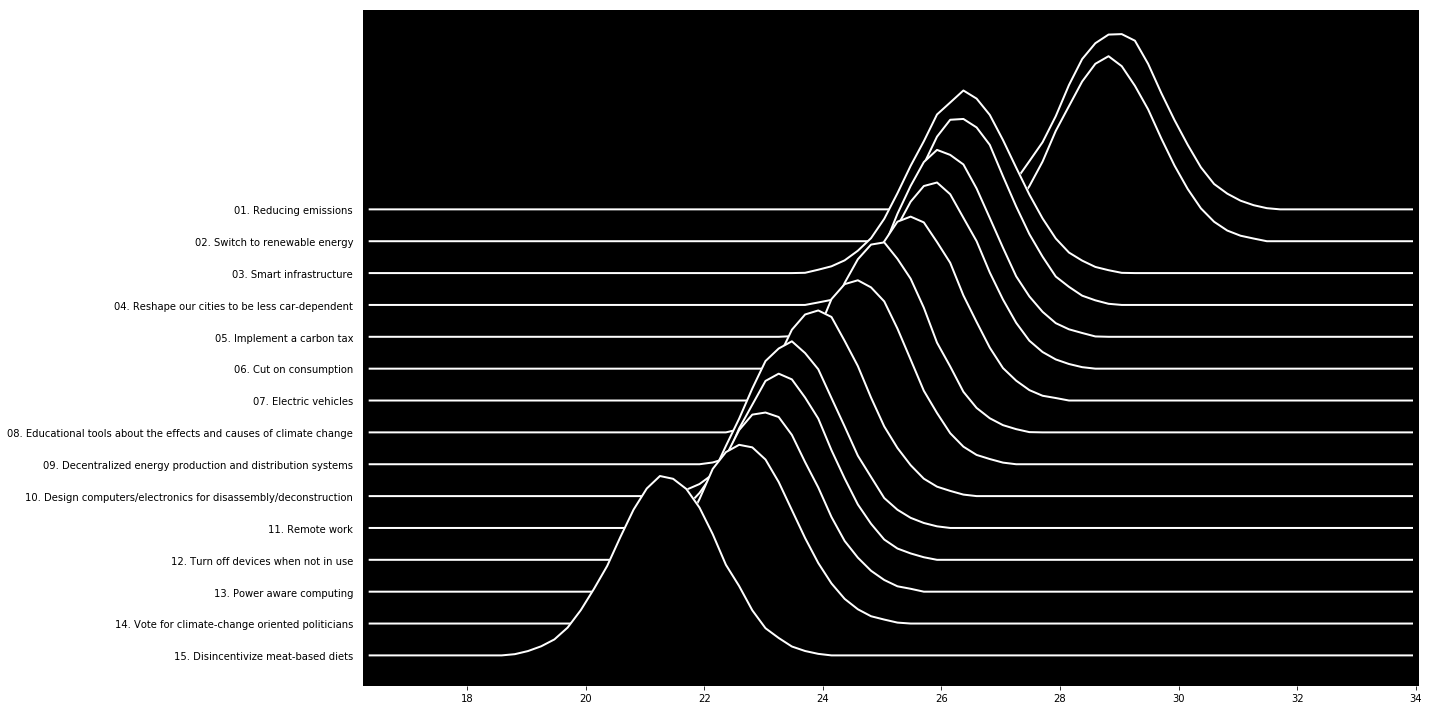

In [8]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Strategy", 
                          grid=False, fill=True, color='k', background='k', linecolor="w", linewidth=2,
                          legend=False, overlap=4, figsize=(20,10), kind="counts", bins=80)


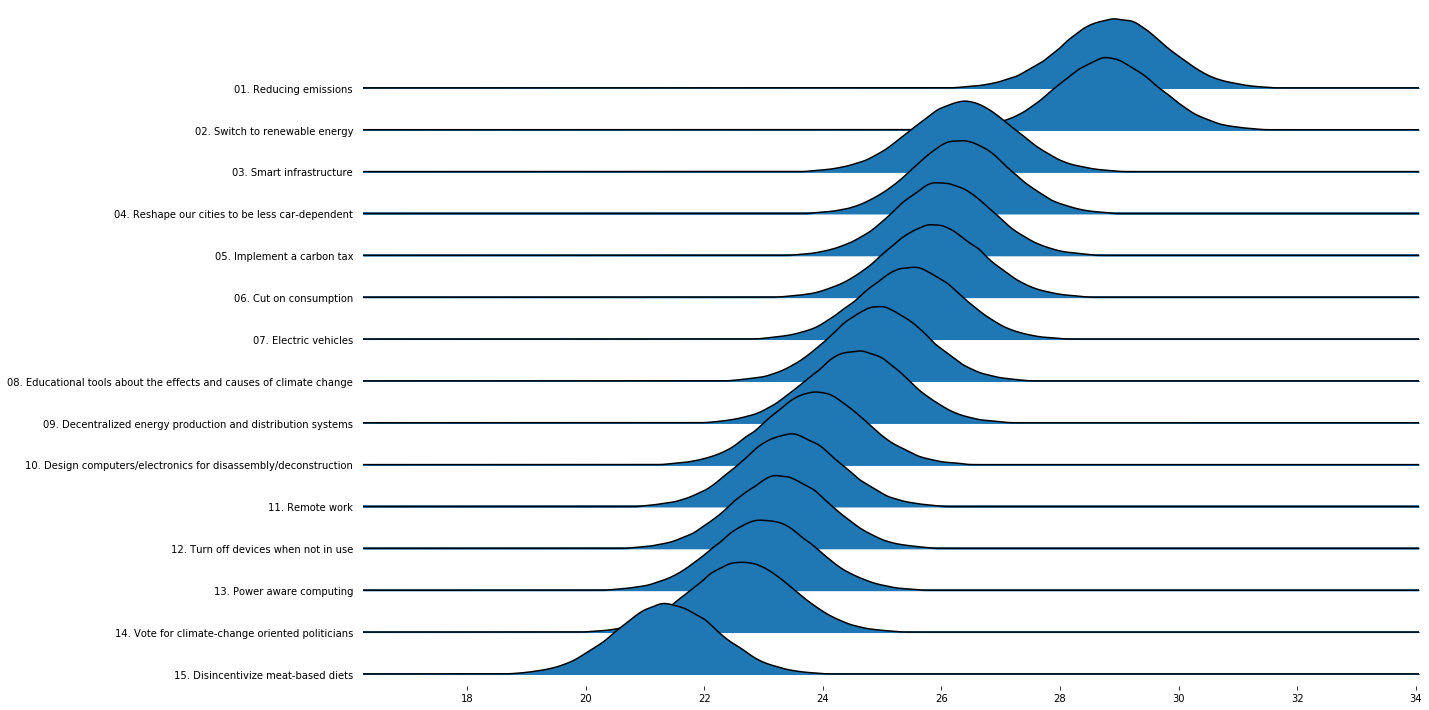

In [9]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Strategy",figsize=(20,10))